In [1]:
using Plots
using Distributions

In [2]:
using Dates

# Zad 1

In [3]:
β₀=2
β₁=4
Α=[0.01,0.05]
Σ=[0.1,0.5,1]
N=50:50:5000
M=1000

1000

In [4]:
b(X,Y,σ)=begin
    x=mean(X)
    y=mean(Y)
    β̂=sum((X.-x) .* Y)/sum( (X.-x).^2 )
    [β̂, y-β̂*x]
end

b (generic function with 1 method)

In [5]:
U₀(b₀,α,σ,X)=begin 
    n=length(X)
    k=quantile(Normal(), 1-α/2)*σ*√(1/n + mean(X)^2/sum((X.-mean(X)).^2))
    [b₀-k, b₀+k]
end

U₁(b₁,α,σ,X)=begin
    n=length(X)
    k=quantile(Normal(), 1-α/2)*σ/√(sum( (X .-mean(X)).^2 ))
    [b₁-k,b₁+k]
end

U₁ (generic function with 1 method)

In [6]:
β₀=2
β₁=4
Α=[0.05,0.1]
Σ=[0.01,0.5,1]
N=50:50:5000
M=1000

1000

In [7]:
Res₁=zeros(length(Α),length(Σ),length(N))
Res₀=zeros(length(Α),length(Σ),length(N))

i=1
t=time()
for n in N
    for σ in Σ
        for α in Α
            for _ in 1:M
                X=1:n
                Y=β₀ .+ β₁ .* X .+ σ*[√(-2log(rand()))*sin(2π*rand()) for _ in 1:n]
                b₁,b₀=b(X,Y,σ)
                u₀=U₀(b₀,α,σ,X)
                u₁=U₁(b₁,α,σ,X)
                #println(u₀,"\t",u₁)
                Res₀[i] += u₀[1]<=β₀<=u₀[2] ? 1 : 0
                Res₁[i] += u₁[1]<=β₁<=u₁[2] ? 1 : 0
            end
            Res₀[i]/=M
            Res₁[i]/=M
            i+=1
        end
    end
end
time()-t

91.46599984169006

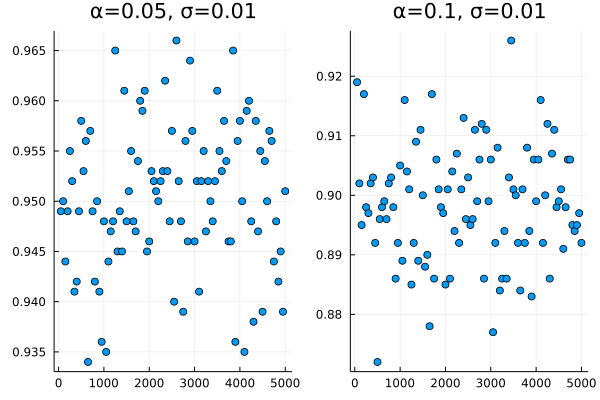

In [40]:
plot(scatter(N,Res₀[1,1,:],title="α=$(Α[1]), σ=$(Σ[1])", leg=false),scatter(N,Res₀[2,1,:],title="α=$(Α[2]), σ=$(Σ[1])", leg=false))

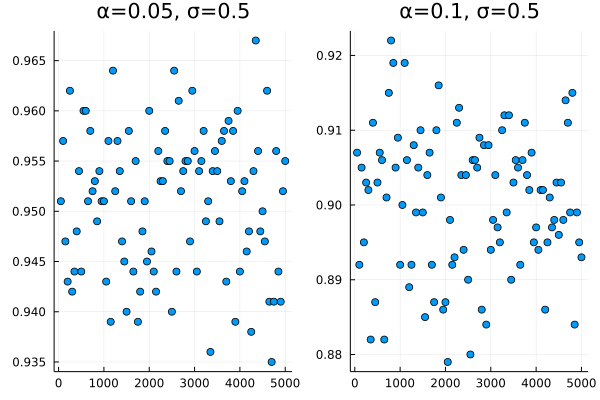

In [41]:
plot(scatter(N,Res₀[1,2,:],title="α=$(Α[1]), σ=$(Σ[2])", leg=false),scatter(N,Res₀[2,2,:],title="α=$(Α[2]), σ=$(Σ[2])", leg=false))

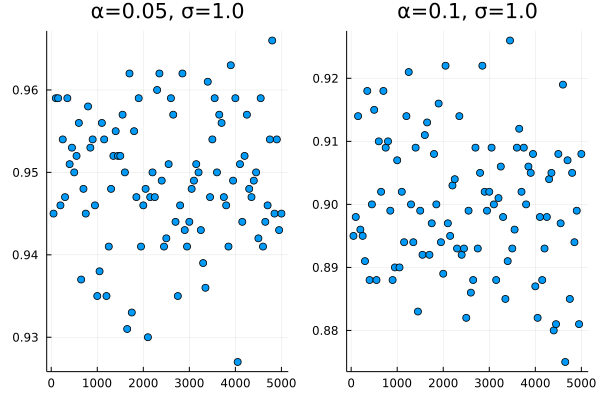

In [42]:
plot(scatter(N,Res₁[1,3,:],title="α=$(Α[1]), σ=$(Σ[3])", leg=false),scatter(N,Res₁[2,3,:],title="α=$(Α[2]), σ=$(Σ[3])", leg=false))

# Zad 2

In [57]:
β₀=2
β₁=4
α=0.05
σ=2
N=1000

1000

In [58]:
X=LinRange(1,10,N)
Y=β₀.+β₁.*X+σ*[√(-2log(rand()))*cos(2π*rand()) for _ in X];

In [59]:
b(X,Y,σ)=begin
    x=mean(X)
    y=mean(Y)
    β̂=sum((X.-x) .* Y)/sum( (X.-x).^2 )
    [β̂, y-β̂*x]
end

b (generic function with 1 method)

In [60]:
quantile(Normal(), 1-α/2),quantile(TDist(998), 1-α/2)

(1.9599639845400576, 1.962343846216334)

In [61]:
ŷ(X,x,y,s,α,σ)=begin
    n=length(X)
    k1=quantile(Normal(), 1-α/2)*σ*(1+1/n + (x-mean(X))^2/sum( (X.-mean(X)).^2) )^(1/2) 
    k2=quantile(TDist(n-2), 1-α/2)*s*(1+1/n + (x-mean(X))^2/sum( (X.-mean(X)).^2) )^(1/2)
    [y-k1 y+k1;
     y-k2 y+k2]
end

ŷ (generic function with 1 method)

In [62]:
b₁,b₀=b(X[1:end-10],Y[1:end-10],σ)

2-element Vector{Float64}:
 3.9923953524306284
 1.969321458395111

In [63]:
s=√( sum( (Y[1:end-9] .-b₀ .- b₁.*X[1:end-9]).^2 )/(length(X[1:end-9])-2) )

2.0280523951815463

In [64]:
x=X[end-9:end]
y=b₀.+b₁.*x

10-element LinRange{Float64, Int64}:
 41.5696,41.6055,41.6415,41.6775,41.7134,…,41.7854,41.8213,41.8573,41.8933

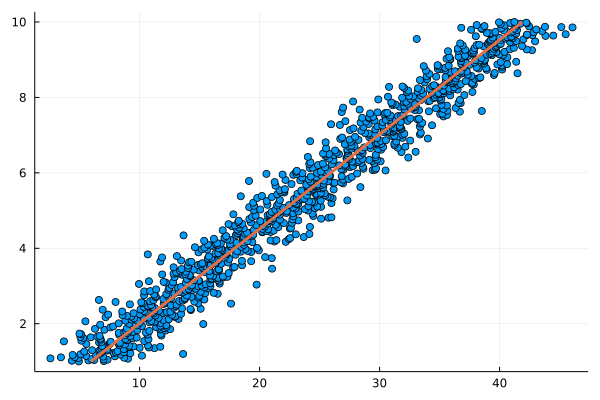

In [65]:
scatter(Y,X)
plot!(b₀.+b₁.*X,X, leg=false, width=3)

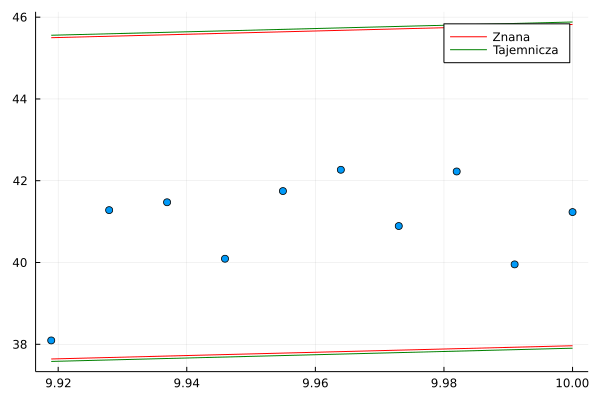

In [66]:
l(x)=ŷ(X[1:end-9],x,b₀+b₁*x,s,α,σ)
scatter(x,Y[end-9:end], label="")
plot!(t->l(t)[1],x,c=:red, label="Znana")
plot!(t->l(t)[3],x,c=:red,label="")
plot!(t->l(t)[2],x,c=:green, label="Tajemnicza")
plot!(t->l(t)[4],x,c=:green, label="")

# Zad 3

In [13]:
β₀=2
β₁=4
α=0.05
Γ=[1,2,3]
Σ=1:0.1:10
N=[1e2,1e3];

In [14]:
X=LinRange(1,10,N)
Y=β₀.+β₁.*X+σ*[√(-2log(rand()))*cos(2π*rand()) for _ in X];

LoadError: MethodError: no method matching LinRange(::Int64, ::Int64, ::Vector{Float64})
[0mClosest candidates are:
[0m  LinRange(::Any, ::Any, [91m::Integer[39m) at C:\Users\Kacper\AppData\Local\Programs\julia-1.7.2\share\julia\base\range.jl:521

In [15]:
ŷ(X,x,y,s,α,σ)=begin
    n=length(X)
    k1=quantile(Normal(), 1-α/2)*σ*(1+1/n + (x-mean(X))^2/sum( (X.-mean(X)).^2) )^(1/2) 
    [y-k1 y+k1]
end

ŷ (generic function with 1 method)

# Śmieci